# Case study - Disease

Attached is a data set dealing with Disease. Dataset has 7200 instances of 21 attributes and a class variable. The variable descriptions are in the text file (variable_description.txt).

1.	Data wrangling 
2.	Explorative Data Analysis 
3.	Feature Engineering 
4.	Modeling. Please build a model that allows you to predict the Class feature. The test data should be taken from the full data set. 
5.	Data Visualisation. Please demonstrate how you would share your findings back to a group of stakeholders outside the data science team , confusion metrix


Goal: 
Predict wheater a patient should be diagnosed with these classes: 

1 - patient diagnosed with normal
2 - patient diagnosed hyperthyroidism
3 - patient diagnosed hypothyroidism


In [9]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


pandas, which was built on Numpy is a top Python library, developed for data manipulation and analysis. 

# 1. Data Wrangling 

In [10]:
filename = 'Data/disease.tsv'
df = pd.read_table(filename, sep='\t') 
df.head(10)

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medication,Sick,Pregnant,Thyroid_surgery,I131_treatment,Query_hypothyroid,...,Goitre,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Class
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0.00060,0.015,0.120,0.082,0.146,3
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.030,0.143,0.133,0.108,3
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00190,0.024,0.102,0.131,0.078,3
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00090,0.017,0.077,0.090,0.085,3
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.026,0.139,0.090,0.153,3
5,0.69,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.016,0.086,0.070,0.123,3
6,0.85,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.023,0.128,0.104,0.121,3
7,0.48,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00208,0.020,0.086,0.078,0.110,3
8,0.67,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.00130,0.024,0.087,0.109,0.080,3
9,0.62,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0.01100,0.008,0.073,0.074,0.098,2


As evident, there are a total of 7200 values, but that does not correspond to the unique values in any reported figure. Thus, few data points might be repeated in the dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        7200 non-null   float64
 1   Sex                        7200 non-null   int64  
 2   On_thyroxine               7200 non-null   int64  
 3   Query_on_thyroxine         7200 non-null   int64  
 4   On_antithyroid_medication  7200 non-null   int64  
 5   Sick                       7200 non-null   int64  
 6   Pregnant                   7200 non-null   int64  
 7   Thyroid_surgery            7200 non-null   int64  
 8   I131_treatment             7200 non-null   int64  
 9   Query_hypothyroid          7200 non-null   int64  
 10  Query_hyperthyroid         7200 non-null   int64  
 11  Lithium                    7200 non-null   int64  
 12  Goitre                     7200 non-null   int64  
 13  Tumor                      7200 non-null   int64

In [12]:
# change the categorical type to categorical variables
df['Sex'] = df['Sex'].astype('object')
df['Class'] = df['Class'].astype('object')
df.dtypes

Age                          float64
Sex                           object
On_thyroxine                   int64
Query_on_thyroxine             int64
On_antithyroid_medication      int64
Sick                           int64
Pregnant                       int64
Thyroid_surgery                int64
I131_treatment                 int64
Query_hypothyroid              int64
Query_hyperthyroid             int64
Lithium                        int64
Goitre                         int64
Tumor                          int64
Hypopituitary                  int64
Psych                          int64
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
Class                         object
dtype: object

In [13]:
df.nunique()

Age                           98
Sex                            2
On_thyroxine                   2
Query_on_thyroxine             2
On_antithyroid_medication      2
Sick                           2
Pregnant                       2
Thyroid_surgery                2
I131_treatment                 2
Query_hypothyroid              2
Query_hyperthyroid             2
Lithium                        2
Goitre                         2
Tumor                          2
Hypopituitary                  2
Psych                          2
TSH                          326
T3                            85
TT4                          272
T4U                          161
FTI                          466
Class                          3
dtype: int64

In [14]:
# change the labelling for better interpretation/ visualization 
df['Class'] = df.Class.replace({1: "Normal", 2: "Hyperthyroidism", 3: "hypothyroidism"})
df['Sex'] = df.Sex.replace({0: "Male", 1: "Female"})
df.head()

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medication,Sick,Pregnant,Thyroid_surgery,I131_treatment,Query_hypothyroid,...,Goitre,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Class
0,0.73,Male,1,0,0,0,0,0,1,0,...,0,0,0,0,0.00060,0.015,0.120,0.082,0.146,hypothyroidism
1,0.24,Male,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.030,0.143,0.133,0.108,hypothyroidism
2,0.47,Male,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00190,0.024,0.102,0.131,0.078,hypothyroidism
3,0.64,Female,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00090,0.017,0.077,0.090,0.085,hypothyroidism
4,0.23,Male,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.026,0.139,0.090,0.153,hypothyroidism


False


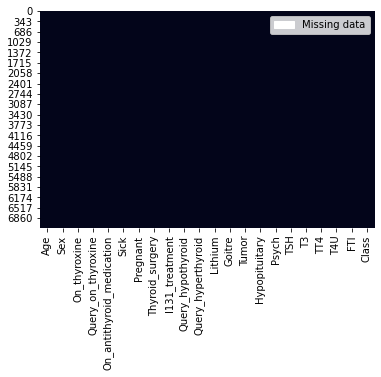

In [15]:
# to check missing values
print (df.isnull().values.any())

# visualize the location of missing values.
sns.heatmap(df.isnull(), cbar=False)
red_patch = mpatches.Patch(color='white', label='Missing data')
plt.legend(handles=[red_patch])

In [16]:
# fill them in with a certain value (zero, mean/max/median by column, string) or drop them by row. df.isna().sum()
df.describe()   

,Age,On_thyroxine,Query_on_thyroxine,On_antithyroid_medication,Sick,Pregnant,Thyroid_surgery,I131_treatment,Query_hypothyroid,Query_hyperthyroid,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,0.520518,0.130556,0.015417,0.012778,0.038333,0.010833,0.014028,0.016806,0.065556,0.068750,0.012639,0.008194,0.025556,0.000139,0.048889,0.004861,0.019977,0.109430,0.097838,0.113215
std,0.189269,0.336937,0.123212,0.112322,0.192013,0.103525,0.117613,0.128551,0.247521,0.253046,0.111718,0.090158,0.157816,0.011785,0.215651,0.022979,0.007539,0.035969,0.019085,0.036098
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000500,0.002000,0.017000,0.002000
25%,0.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000710,0.017000,0.089000,0.087000,0.095000
50%,0.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001700,0.020100,0.107000,0.097000,0.111000
75%,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002700,0.022000,0.125000,0.104000,0.127000
max,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.530000,0.180000,0.600000,0.233000,0.642000


# 2.	Explorative Data Analysis on TD

Text(0.5, 1.0, 'Age Distribution')

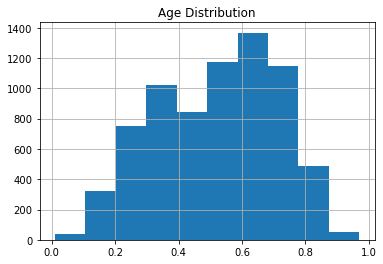

In [17]:
# print(df.age.value_counts())
df['Age'].hist().plot(kind='bar')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Sick vs Sex')

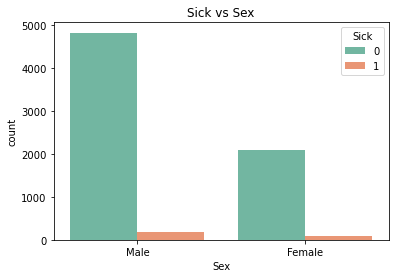

In [18]:
sns.countplot(x='Sex', hue='Sick', data=df, palette='Set2').set_title('Sick vs Sex')

Text(0.5, 1.0, 'Pregnancy vs Sex')

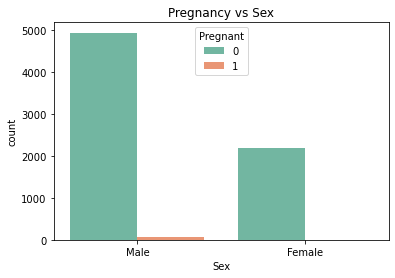

In [19]:
sns.countplot(x='Sex', hue='Pregnant', data=df, palette='Set2').set_title('Pregnancy vs Sex')

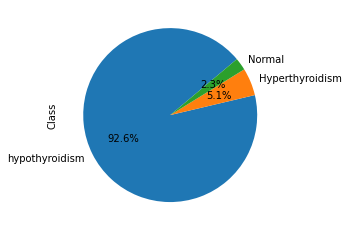

In [20]:
#plot the pie chart of education categories
df.Class.value_counts(normalize=True).plot.pie(autopct='%.1f%%', startangle=40)
plt.show()

Text(0, 0.5, 'Count of Class')

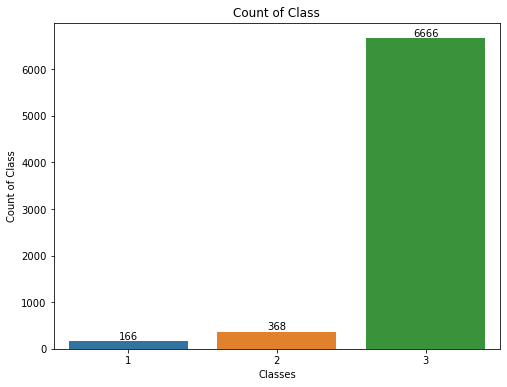

In [117]:
# Bar plot - Count Plot
# Count the data points based on a certain categorical column
plt.figure(figsize = (8, 6))
ocean_plot = sns.countplot(x = 'Class', data = df)
for p in ocean_plot.patches:
    ocean_plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of Class")
plt.xlabel("Classes")
plt.ylabel("Count of Class")

Text(0, 0.5, 'Median Age value')

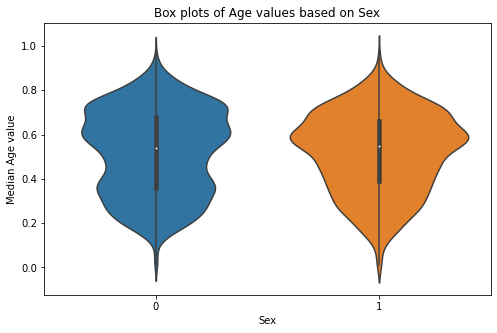

In [118]:
plt.figure(figsize = (8,5))
sns.violinplot(x = 'Sex', y = 'Age', data = df)
plt.title("Box plots of Age values based on Sex")
plt.xlabel("Sex")
plt.ylabel("Median Age value")

C:\Users\dk106573\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Value')

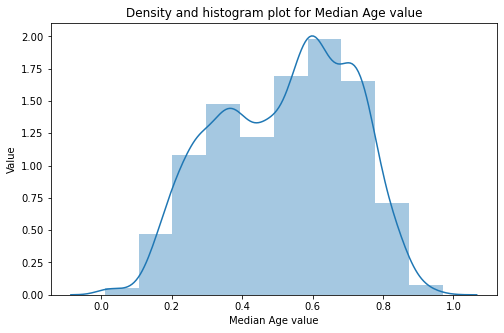

In [119]:
plt.figure(figsize = (8, 5))
sns.distplot(a = df['Age'], bins = 10, hist = True)
plt.title("Density and histogram plot for Median Age value")
plt.xlabel("Median Age value")
plt.ylabel("Value")

C:\Users\dk106573\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


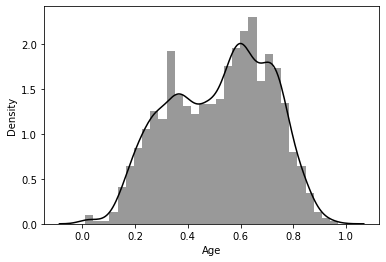

In [121]:
sns.distplot(a=df['Age'], color='black');

Text(45.0, 0.5, 'Total Age')

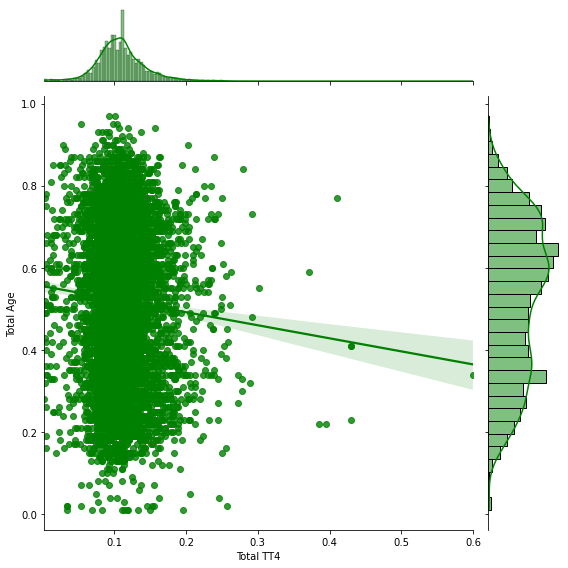

In [83]:
sns.jointplot(x = "TT4", y = "Age", data=df, kind="reg", height = 8, color = 'g')
plt.xlabel("Total TT4")
plt.ylabel("Total Age")

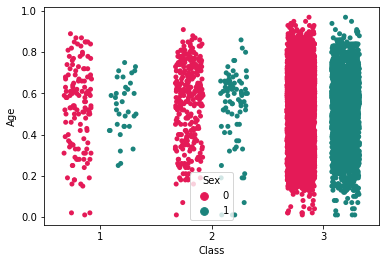

In [95]:
p = sns.stripplot(data=df,
                  x="Class",
                  y="Age",
                  hue="Sex",
                  #order=sorted("Class"),
                  jitter=0.25,
                  dodge=True,
                  palette=sns.husl_palette(2, l=0.5, s=.95))

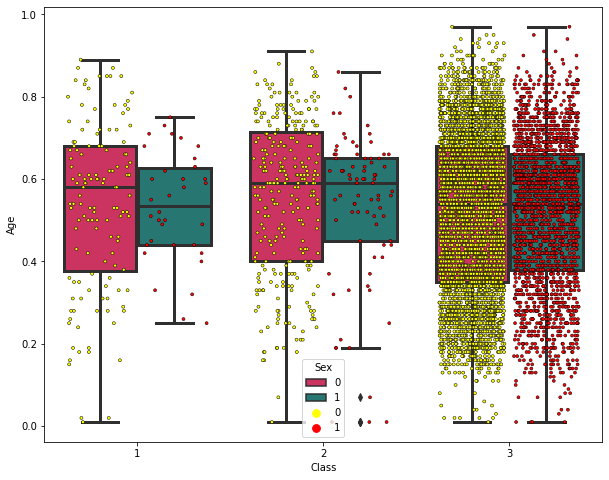

In [120]:
plt.figure(figsize = (10, 8))
params = dict(data=df,
                  x="Class",
                  y="Age",
                  hue="Sex",
              #jitter=0.25,
              #order=sorted(players_to_use),
              dodge=True)
p = sns.stripplot(size=3,
                  jitter=0.35,
                  palette=['yellow','red'],
                  edgecolor='black',
                  linewidth=.5,
                  **params)
p_box = sns.boxplot(palette=sns.husl_palette(2, l=0.5, s=.95),linewidth=3,**params)

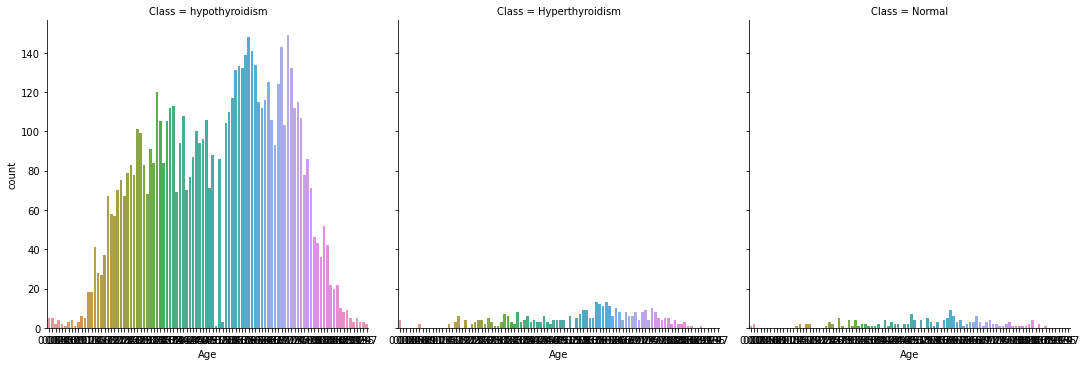

In [30]:
g=sns.catplot(x='Age', col='Class', kind='count', data=df);

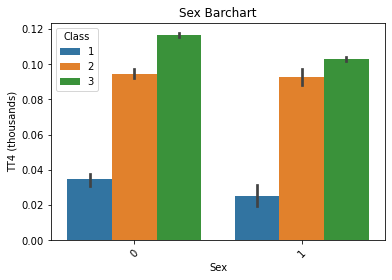

In [128]:
# Population Bar chart 
sns.barplot(x="Sex",y="TT4", hue="Class", data = df)

# Use Matplotlib functions to label axes rotate tick labels
ax = plt.gca()
ax.set(xlabel="Sex", ylabel="TT4 (thousands)")
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
plt.title("Sex Barchart")

# Show the figure
plt.show()

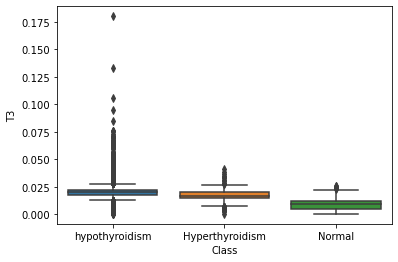

In [31]:
sns.boxplot(x=df['Class'], y=df['T3']);


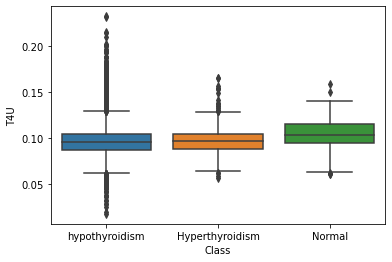

In [32]:
sns.boxplot(x=df['Class'], y=df['T4U']);


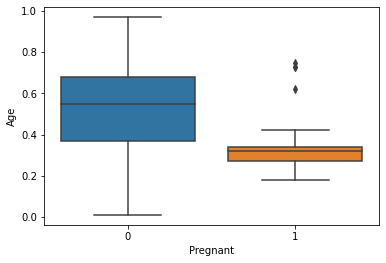

In [33]:
sns.boxplot(x=df['Pregnant'], y=df['Age']);


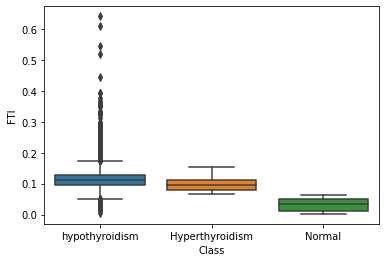

In [34]:
sns.boxplot(x=df['Class'], y=df['FTI']);

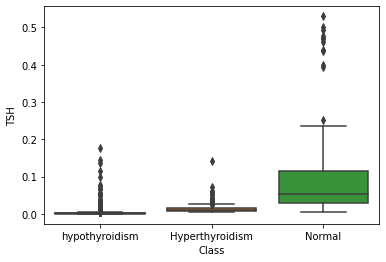

In [35]:
sns.boxplot(x=df['Class'], y=df['TSH']);

# 3.Feature Engineering

<AxesSubplot:>

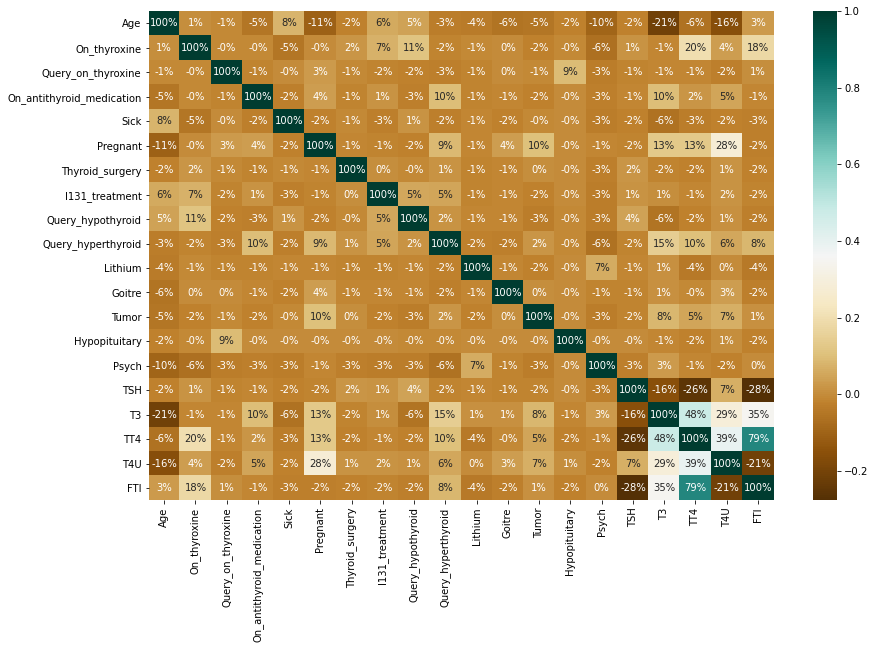

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,9)) 
sns.heatmap(df.corr(),cmap='BrBG', annot=True, fmt='.0%')

In [37]:
#extract the 10 best features
filename = 'Data/thyroid.tsv'
df = pd.read_table(filename, sep='\t') 

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)
df 

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medication,Sick,Pregnant,Thyroid_surgery,I131_treatment,Query_hypothyroid,...,Goitre,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Class
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0.00060,0.0150,0.12000,0.082,0.14600,3
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.0300,0.14300,0.133,0.10800,3
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00190,0.0240,0.10200,0.131,0.07800,3
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00090,0.0170,0.07700,0.090,0.08500,3
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.0260,0.13900,0.090,0.15300,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,0.36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00232,0.0201,0.11329,0.096,0.11776,3
7196,0.27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00150,0.0201,0.09000,0.082,0.11000,3
7197,0.26,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00100,0.0201,0.08000,0.075,0.10700,3
7198,0.95,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00160,0.0201,0.09800,0.091,0.10800,3


In [40]:
#Frequency distribution of classes"
train_outcome = pd.crosstab(index=train["Class"],  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome

col_0,count
Class,
1,126
2,293
3,5341


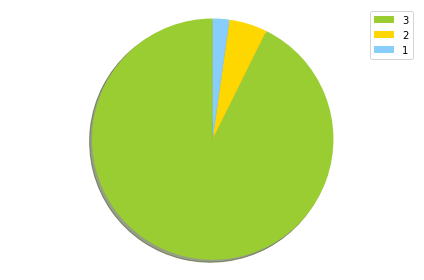

In [104]:
# Visualizing Outcome Distribution 
temp = train["Class"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

#df.plot(kind='pie',labels='labels',values='values', title='Activity Ditribution',subplots= "True")

labels = df['labels']
sizes = df['values']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','cyan','lightpink']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

# 4 ) Support Vector Machine (SVM)

In [41]:
# Seperating Predictors and Outcome values from train and test sets
X_train = pd.DataFrame(train.drop(['Class'],axis=1))
Y_train_label = train.Class.values
X_test = pd.DataFrame(test.drop(['Class'],axis=1))
Y_test_label = test.Class.values

In [42]:
# Dimension of Train and Test set 
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

Dimension of Train set (5760, 21)
Dimension of Test set (1440, 21) 



In [43]:
# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [50]:
# encoding train labels 
encoder.fit(Y_train_label)
Y_train = encoder.transform(Y_train_label)
# encoding test labels 
encoder.fit(Y_test_label)
Y_test = encoder.transform(Y_test_label)

#Total Number of Continous and Categorical features in the training set
num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)



Number of numeric features: 21


In [51]:
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [52]:
names_of_predictors = list(X_train.columns.values)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
# Performing CV to tune parameters for best SVM fit 
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [54]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

Best score for training data: 0.9765625 

Best C: 1000 

Best Kernel: linear 

Best Gamma: scale 



In [55]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(Y_test_label,Y_pred_label))
print("\n")
print(classification_report(Y_test_label,Y_pred_label))

print("Training set score for SVM: %f" % final_model.score(X_train_scaled , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , Y_test ))

svm_model.score

[[  37    0    3]
 [   0   50   25]
 [   3    6 1316]]


              precision    recall  f1-score   support

           1       0.93      0.93      0.93        40
           2       0.89      0.67      0.76        75
           3       0.98      0.99      0.99      1325

    accuracy                           0.97      1440
   macro avg       0.93      0.86      0.89      1440
weighted avg       0.97      0.97      0.97      1440

Training set score for SVM: 0.978472
Testing  set score for SVM: 0.974306


<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])>